In [1]:
%reload_ext autoreload
%autoreload 2`

In [2]:
%matplotlib inline

import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import gridspec
import cartopy.crs as ccrs
from numba import njit

from glob import glob

from xhistogram.xarray import histogram
import julian
import datetime
import cftime
#import xrft


In [3]:
plt.rcParams['font.family'] = 'STIX Two Text'
plt.rcParams.update({"font.size":12})
#savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='jpeg')
savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='pdf')
degC= "$^{\circ}$C" 
    # Use the same font as JAMES
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)
sig_axis_plot_lims=[27,28]

In [4]:
%%time
z_layer_var="rho0_l"
z_inter_var="rho0_i"
calc_rho_flag=False
numpy_algo=False
mom_gridwidth_algo=False
section_node_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000]
section_node_lons=[-44.9000, -30.5400, -28.0000, -14.7000, -5.9300]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


In [ ]:
####RUN FOR EACH run_dict SEPARATELY

In [5]:
run_dict= { 'CM4X-P125' :  {'legend_labelwsig' : 'b)',
                        ' legend_labelesig' : 'e)',       
                        'title' : 'CM4X-p125',
                       },
          }

In [12]:
run_dict= { 'CM4X-P25' :  {'legend_labelwsig' : 'c)',
                            'legend_labelesig' : 'f)',
                            'title' : 'CM4X-p25',
                      },
            }

In [13]:
for keys in run_dict:
    title=run_dict[keys]['title']
ds_east=xr.open_dataset(title+"_2014_2020_east_Sigmaz.nc")
ds_east_OSNAP=xr.open_dataset("OBSOSNAP_2014_2020_east_Sigmaz.nc")
ds_Obs_east=xr.open_dataset("OSNAP_obs_east.nc")
ds_rho0_bounds=xr.open_dataset(title+"rho0_bounds_2014_2020_east_Sigmaz.nc")
grid_east=xr.open_dataset(title+"grid_east.nc")
dsT_east=xr.open_dataset(title+"dsT_east.nc")
################
print (grid_east.data_vars)
print (dsT_east.data_vars)
###########
print (ds_east.data_vars)
print (ds_east_OSNAP.data_vars)
print (ds_rho0_bounds.data_vars)
#####
AMOCz_east=ds_east["AMOCz_east"]
AMOCrho_east=ds_east["AMOCrho_east"]
ty_z_east_odiv209=ds_east["ty_z_east_odiv209"]
AMOCz_east_ts_odiv209=ds_east["AMOCz_east_ts_odiv209"]
AMOCrho_east_ts_odiv209=ds_east["AMOCrho_east_ts_odiv209"]
ty_rho_east_odiv209=ds_east["ty_rho_east_odiv209"]
ty_z_rho_rebin_east=ds_east["ty_z_rho_rebin_east"]
ty_rho_east_OSNAP=ds_east_OSNAP["ty_rho_east_OSNAP"]
ty_z_east_OSNAP=ds_east_OSNAP["ty_z_east_OSNAP"]
AMOCz_east_OSNAP=ds_east_OSNAP["AMOCz_east_OSNAP"]
AMOCz_east_OSNAP_ts=ds_east_OSNAP["AMOCz_east_OSNAP_ts"]
AMOCrho_east_OSNAP_ts=ds_east_OSNAP["AMOCrho_east_OSNAP_ts"]
AMOCrho_east_OSNAP=ds_east_OSNAP["AMOCrho_east_OSNAP"]
ty_z_rho_OSNAP_east=ds_east_OSNAP["ty_z_rho_OSNAP_east"]
ty_z_rho_rebin_OSNAP_east=ds_east_OSNAP["ty_z_rho_rebin_OSNAP_east"]
PD_OSNAP_east=ds_Obs_east["PD_OSNAP_east"]
Transp_OSNAP_east=ds_Obs_east["Transp_OSNAP_east"]
Area_east =ds_Obs_east["Area_east_OSNAP"]
depth_OSNAP=ds_Obs_east["depth_OSNAP"]
section_gridwidth_OSNAP_east=ds_Obs_east["section_gridwidth_OSNAP_east"]
rho0_ref=ds_east["rho0_refxr"]
rho0_bounds=ds_rho0_bounds["rho0_boundsxr"] 
transp_east=ds_east["transp_east"]
cell_area_east=ds_east["cell_area_east"]
rho_east=ds_east["rho_east"]
section_gridwidth_east=ds_east["section_gridwidth_east"]
dsesec = xr.open_dataset(title + "_2014_2020_eastsec_Sigmaz.nc")

deptheast = dsesec["deptheast"].values
iseceast = dsesec["iseceast"].values
jseceast = dsesec["jseceast"].values


Data variables:
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    deptho        (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyCu          (yh, xq) float32 ...
    dyCv          (yq, xh) float32 ...
    dyt           (yh, xh) float32 ...
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolat_u      (yh, xq) float32 ...
    geolat_v      (yq, xh) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    geolon_u      (yh, xq) float32 ...
    geolon_v      (yq, xh) float32 ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v

In [14]:
ds_west=xr.open_dataset(title+"_2014_2020_west_Sigmaz.nc")
ds_west_OSNAP=xr.open_dataset("OBSOSNAP_2014_2020_west_Sigmaz.nc")
ds_Obs_west=xr.open_dataset("OSNAP_obs_west.nc") 
ds_rho0_bounds=xr.open_dataset(title+"rho0_bounds_2014_2020_west_Sigmaz.nc")
grid_west=xr.open_dataset(title+"grid_west.nc")
dsT_west=xr.open_dataset(title+"dsT_west.nc")
################
print (ds_west.data_vars)
print (ds_west_OSNAP.data_vars)
print (ds_rho0_bounds.data_vars)
print (grid_west.data_vars)
print (dsT_west.data_vars)
####################
AMOCz_west=ds_west["AMOCz_west"]
AMOCrho_west=ds_west["AMOCrho_west"]
ty_z_west_odiv209=ds_west["ty_z_west_odiv209"]
AMOCz_west_ts_odiv209=ds_west["AMOCz_west_ts_odiv209"]
AMOCrho_west_ts_odiv209=ds_west["AMOCrho_west_ts_odiv209"]
ty_rho_west_odiv209=ds_west["ty_rho_west_odiv209"]
ty_z_rho_rebin_west=ds_west["ty_z_rho_rebin_west"]
ty_rho_west_OSNAP=ds_west_OSNAP["ty_rho_west_OSNAP"]
ty_z_west_OSNAP=ds_west_OSNAP["ty_z_west_OSNAP"]
ty_rho_west_OSNAP=ds_west_OSNAP["ty_rho_west_OSNAP"]
ty_z_west_OSNAP=ds_west_OSNAP["ty_z_west_OSNAP"]
AMOCz_west_OSNAP=ds_west_OSNAP["AMOCz_west_OSNAP"]
AMOCrho_west_OSNAP=ds_west_OSNAP["AMOCrho_west_OSNAP"]
ty_z_rho_OSNAP_west=ds_west_OSNAP["ty_z_rho_OSNAP_west"]
ty_z_rho_rebin_OSNAP_west=ds_west_OSNAP["ty_z_rho_rebin_OSNAP_west"]
AMOCz_west_OSNAP_ts=ds_west_OSNAP["AMOCz_west_OSNAP_ts"]
AMOCrho_west_OSNAP_ts=ds_west_OSNAP["AMOCrho_west_OSNAP_ts"]
PD_OSNAP_west=ds_Obs_west["PD_OSNAP_west"]
Transp_OSNAP_west=ds_Obs_west["Transp_OSNAP_west"]
Area_west =ds_Obs_west["Area_west_OSNAP"]
depth_OSNAP=ds_Obs_west["depth_OSNAP"]
section_gridwidth_OSNAP_west=ds_Obs_west["section_gridwidth_OSNAP_west"]
rho0_ref=ds_west["rho0_refxr"]

rho0_ref=ds_west["rho0_refxr"]
rho0_bounds=ds_rho0_bounds["rho0_boundsxr"] 
transp_west=ds_west["transp_west"]
cell_area_west=ds_west["cell_area_west"]
section_gridwidth_west=ds_west["section_gridwidth_west"]
rho_west=ds_west["rho_west"]
dswsec = xr.open_dataset(title + "_2014_2020_westsec_Sigmaz.nc")

depthwest = dswsec["depthwest"].values
isecwest = dswsec["isecwest"].values
jsecwest = dswsec["jsecwest"].values
AMOCrho_west_OSNAP_ts
AMOCz_west_OSNAP_ts
AMOCrho_west_OSNAP

Data variables:
    AMOCz_west               (time, z_l_rebin) float64 ...
    AMOCrho_west             (time, rho_bin) float64 ...
    ty_z_west_odiv209        (time, z_l_rebin) float64 ...
    ty_rho_west_odiv209      (time, rho_bin) float64 ...
    AMOCz_west_ts_odiv209    (time) float64 ...
    AMOCrho_west_ts_odiv209  (time) float64 ...
    ty_z_rho_rebin_west      (time, z_l_rebin, rho_bin) float64 ...
    rho0_refxr               (dim_0) float64 ...
    transp_west              (time, z_l, sect) float32 ...
    cell_area_west           (z_l, sect) float64 ...
    section_gridwidth_west   (sect) float32 ...
    rho_west                 (time, z_l, sect) float32 ...
Data variables:
    ty_rho_west_OSNAP          (time, rho_bin) float64 ...
    ty_z_west_OSNAP            (time, z_l_rebin) float64 ...
    AMOCz_west_OSNAP           (time, z_l_rebin) float64 ...
    AMOCrho_west_OSNAP         (time, rho_bin) float64 ...
    AMOCz_west_OSNAP_ts        (time) float64 ...
    AMOCrho_we

<xarray.DataArray 'AMOCrho_west_OSNAP' (time: 71, rho_bin: 499)>
[35429 values with dtype=float64]
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 61 62 63 64 65 66 67 68 69 70
  * rho_bin  (rho_bin) float64 21.0 21.01 21.03 21.04 ... 28.04 28.06 28.07

((-4000.0, 0.0), (-2.0, 2.0))

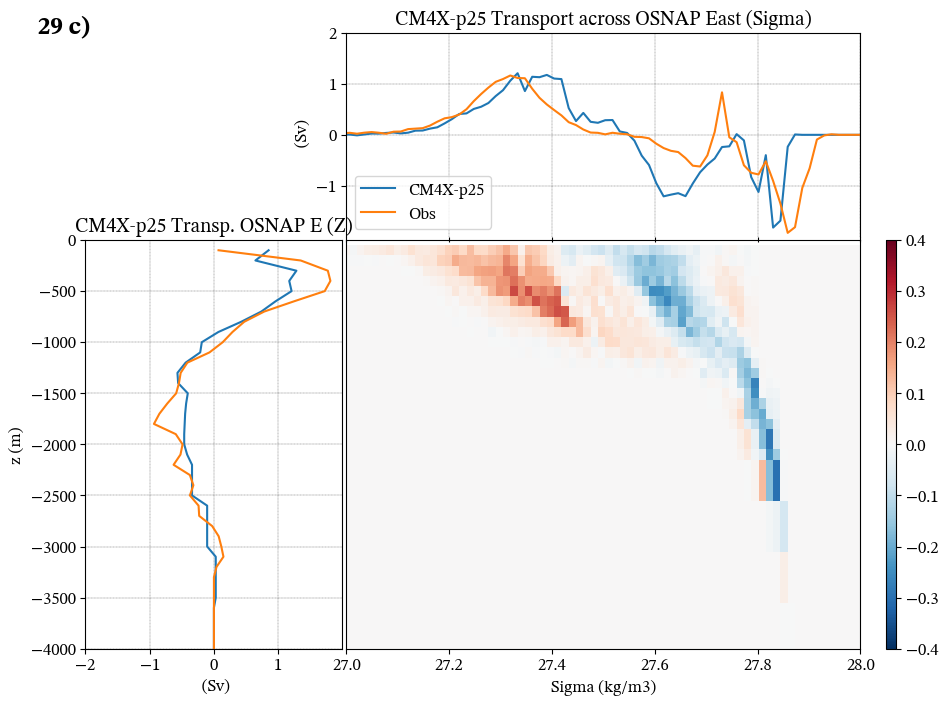

In [15]:
### Plot SigmaZ diagram and streamfunctions along OSNAP East
#####################EAST####EAST######EAST################################

##########################################################################
for keys in run_dict:
    title=run_dict[keys]['title']
    if title=="CM4X-p25":
        figlabel='29 c)'
    if title=="CM4X-p125":
        figlabel='29 b)'
##################################################################
##############################################################
section="East"
section2="E"
rholims=[21,28.1];
nrho=500;
#depth=dsT_west[z_layer_var]
rebin_depth=np.arange(100,6600,100)
rho0=1035
sig_axis_plot_lims=[27,28]
z_axis_plot_lims=[0,4000]
#spec = gridspec.GridSpec(ncols=2, nrows=2,
#    width_ratios=[1,2], wspace=0.3,
#    hspace=0.3, height_ratios=[1, 2])
spec = gridspec.GridSpec(ncols=2, nrows=2,
    width_ratios=[1,2], wspace=0.01,
    hspace=0.01, height_ratios=[1, 2])
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(spec[3])
ch1=ax0.pcolormesh(rho0_bounds[0:-1],-rebin_depth,ty_z_rho_rebin_east.mean(axis=0)/rho0/1e6,vmin=-4.e-1,vmax=4.e-1,cmap='RdBu_r')

ax0.set_xlabel('Sigma (kg/m3)')
#ax0.spines['left'].set_visible(False)
#ax0.set_yticklabels([])
plt.yticks([])
plt.xlim( [sig_axis_plot_lims[0],sig_axis_plot_lims[1]] ), plt.ylim( [-z_axis_plot_lims[1],-z_axis_plot_lims[0]] )
box = ax0.get_position()
ax0.set_position([box.x0*1, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(ch1, cax = axColor, orientation="vertical")

ax1 = fig.add_subplot(spec[1])

ax1.plot(rho0_ref,ty_rho_east_odiv209.mean(axis=0)/rho0/1e6,label=title)

ax1.plot(rho0_ref,ty_rho_east_OSNAP.mean(axis=0)/rho0/1e6,label='Obs')
plt.legend()
ax1.set_title(title+' Transport across OSNAP '+section+" (Sigma)")
ax1.set_ylabel(' (Sv)')
ax1.text(26.4, 2,figlabel , fontsize=18, color='black',fontweight='bold')
plt.yticks(ticks=[-1,0,1,2])
plt.xticks(alpha=0.0)
plt.xlim([sig_axis_plot_lims[0],sig_axis_plot_lims[1]]), plt.ylim( [-2,2] )
ax1.spines['bottom'].set_visible(False)
plt.grid(color='black', linestyle='--', linewidth=.2)
ax2 = fig.add_subplot(spec[2])
ax2.plot(ty_z_east_odiv209.mean(axis=0)/rho0/1e6,-rebin_depth)
ax2.plot(ty_z_east_OSNAP.mean(axis=0)/rho0/1e6,-rebin_depth)
ax2.set_title(title+' Transp. OSNAP '+section2+" (Z)")
ax2.set_xlabel(' (Sv)')
plt.grid(color='black', linestyle='--', linewidth=.2)

ax2.set_ylabel('z (m)')    

plt.xticks(ticks=[-2,-1,0,1])
plt.ylim([-z_axis_plot_lims[1],-z_axis_plot_lims[0]]), plt.xlim([-2,2]),

#plt.savefig("Fig_7b_2014_2020_AMOC_OSNAPE_Sigma_Z_"+title+"_OBS_10_31.jpeg", **savefig_kws)
############################################################




                                 


Data variables:
    AMOCz_west               (time, z_l_rebin) float64 ...
    AMOCrho_west             (time, rho_bin) float64 ...
    ty_z_west_odiv209        (time, z_l_rebin) float64 ...
    ty_rho_west_odiv209      (time, rho_bin) float64 ...
    AMOCz_west_ts_odiv209    (time) float64 ...
    AMOCrho_west_ts_odiv209  (time) float64 ...
    ty_z_rho_rebin_west      (time, z_l_rebin, rho_bin) float64 ...
    rho0_refxr               (dim_0) float64 ...
    transp_west              (time, z_l, sect) float32 ...
    cell_area_west           (z_l, sect) float64 ...
    section_gridwidth_west   (sect) float32 ...
    rho_west                 (time, z_l, sect) float32 ...
Data variables:
    ty_rho_west_OSNAP          (time, rho_bin) float64 ...
    ty_z_west_OSNAP            (time, z_l_rebin) float64 ...
    AMOCz_west_OSNAP           (time, z_l_rebin) float64 ...
    AMOCrho_west_OSNAP         (time, rho_bin) float64 ...
    AMOCz_west_OSNAP_ts        (time) float64 ...
    AMOCrho_we

((-4000.0, 0.0), (-2.0, 2.0))

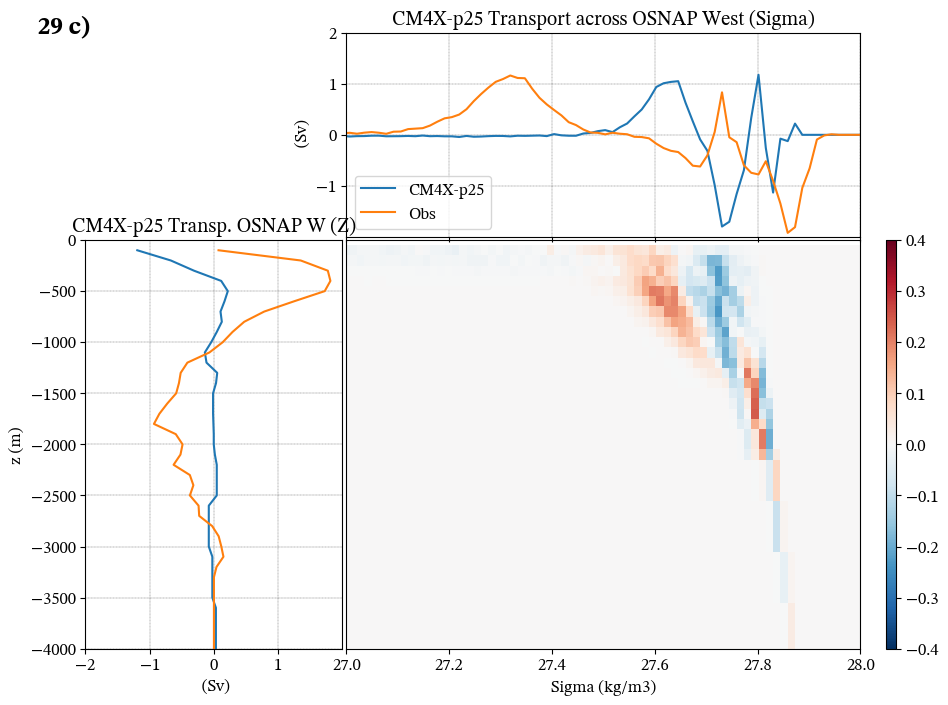

In [16]:
### Plot SigmaZ diagram and streamfunctions along OSNAP West
#####################WEST##########################WEST##############################WEST##################################
for keys in run_dict:
    title=run_dict[keys]['title']
    if title=="CM4X-p25":
        figlabel='29 c)'
    if title=="CM4X-p125":
        figlabel='29 b)'
####################################################################
ds_west=xr.open_dataset(title+"_2014_2020_west_Sigmaz.nc")
ds_west_OSNAP=xr.open_dataset("OBSOSNAP_2014_2020_west_Sigmaz.nc")
ds_rho0_bounds=xr.open_dataset(title+"rho0_bounds_2014_2020_west_Sigmaz.nc")
################
print (ds_west.data_vars)
print (ds_west_OSNAP.data_vars)
print (ds_rho0_bounds.data_vars)
####################
AMOCz_west=ds_west["AMOCz_west"]
AMOCrho_west=ds_west["AMOCrho_west"]
ty_z_west_odiv209=ds_west["ty_z_west_odiv209"]
AMOCz_west_ts_odiv209=ds_west["AMOCz_west_ts_odiv209"]
AMOCrho_west_ts_odiv209=ds_west["AMOCrho_west_ts_odiv209"]
ty_rho_west_odiv209=ds_west["ty_rho_west_odiv209"]
ty_z_rho_rebin_west=ds_west["ty_z_rho_rebin_west"]
ty_rho_west_OSNAP=ds_west_OSNAP["ty_rho_west_OSNAP"]
ty_z_west_OSNAP=ds_west_OSNAP["ty_z_west_OSNAP"]
rho0_ref=ds_west["rho0_refxr"]
rho0_bounds=ds_rho0_bounds["rho0_boundsxr"] 
##################################################################
section="West"
section2="W"

############################################################
spec = gridspec.GridSpec(ncols=2, nrows=2,
    width_ratios=[1,2], wspace=0.01,
    hspace=0.01, height_ratios=[1, 2])
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(spec[3])
ch1=ax0.pcolormesh(rho0_bounds[0:-1],-rebin_depth,ty_z_rho_rebin_west.mean(axis=0)/rho0/1e6,vmin=-4.e-1,vmax=4.e-1,cmap='RdBu_r')
#       ch1=ax0.plot(rho_bounds[0:-1],-depth,ty_z_rho.mean(axis=0)/rho0/1e6,vmin=-5e-1,vmax=5e-1,cmap='RdBu_r')
#ax0.set_title(title+' Transport across OSNAP '+section+" (Sigma-Z)")
ax0.set_xlabel('Sigma (kg/m3)')
#ax0.spines['left'].set_visible(False)
#ax0.set_yticklabels([])
plt.yticks([])
plt.xlim( [sig_axis_plot_lims[0],sig_axis_plot_lims[1]] ), plt.ylim( [-z_axis_plot_lims[1],-z_axis_plot_lims[0]] )
box = ax0.get_position()
ax0.set_position([box.x0*1, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(ch1, cax = axColor, orientation="vertical")
#plt.show()
ax1 = fig.add_subplot(spec[1])
ax1.plot(rho0_ref,ty_rho_west_odiv209.mean(axis=0)/rho0/1e6,label=title)
ax1.plot(rho0_ref,ty_rho_west_OSNAP.mean(axis=0)/rho0/1e6,label='Obs')
ax1.set_title(title+' Transport across OSNAP '+section+" (Sigma)")
plt.legend()
ax1.set_ylabel(' (Sv)')
ax1.text(26.4, 2,figlabel , fontsize=18, color='black',fontweight='bold')

plt.yticks(ticks=[-1,0,1,2])
plt.xticks(alpha=0.0)
plt.grid(color='black', linestyle='--', linewidth=.2)
plt.xlim([sig_axis_plot_lims[0],sig_axis_plot_lims[1]]), plt.ylim( [-2,2] )
ax2 = fig.add_subplot(spec[2])
ax2.plot(ty_z_west_odiv209.mean(axis=0)/rho0/1e6,-rebin_depth)
ax2.plot(ty_z_west_OSNAP.mean(axis=0)/rho0/1e6,-rebin_depth)
ax2.set_title(title+' Transp. OSNAP '+section2+" (Z)")
ax2.set_xlabel(' (Sv)')
ax2.set_ylabel('z (m)')   
plt.grid(color='black', linestyle='--', linewidth=.2)
plt.xticks(ticks=[-2,-1,0,1])
plt.ylim([-z_axis_plot_lims[1],-z_axis_plot_lims[0]]), plt.xlim([-2,2])



first_nan_index= <xarray.DataArray 'transp_west' (sect: 108)>
array([ 0,  0,  0,  0,  0,  5,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 11,
       11, 12, 11, 11, 11, 12, 12, 14, 21, 25, 26, 27, 27, 28, 28, 28, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 27, 27, 26, 26, 25, 23, 22, 13,  9,  9,  9,
        9,  7,  4,  0,  0,  0])
Coordinates:
    time     object 2014-01-16 12:00:00
    xsec     (sect) float64 ...
    ysec     (sect) float64 ...
Dimensions without coordinates: sect
first_time_dsT_west= <xarray.DataArray 'uvnormal' (z_l: 35, sect: 108)>
[3780 values with dtype=float32]
Coordinates:
    time     object 2010-01-16 12:00:00
    xsec     (sect) float64 ...
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    ysec     (sect) float64 ...
Di

Text(1050000, -2000, 'ISO')

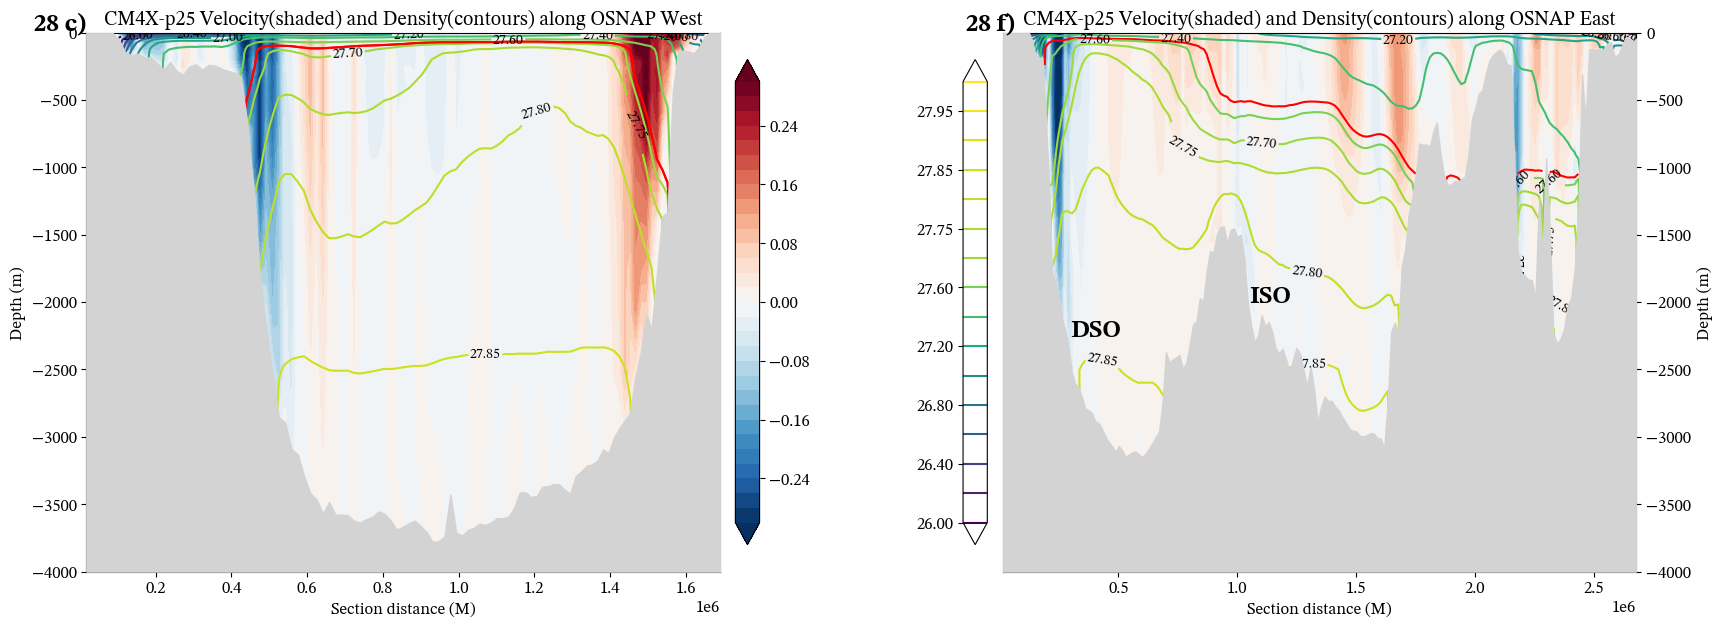

In [17]:
### Plot cross-sections of V, T, S and Rho along OSNAP East and West
plt.rcParams.update({"font.size":12})
figsize=[6.5,4.0]
savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='jpeg')
degC= "$^{\circ}$C"
# Use the same font as JAMES
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'
#####################################################for keys in run_dict:
title=run_dict[keys]['title']
if title=="CM4X-p25":
    figlabelw='28 c)'
    figlabele='28 f)'
if title=="CM4X-p125":
    figlabelw='28 b)'
    figlabele='28 e)'
#######################################################
z_layer_var='z_l'
rho0=1035
numpy_algo=False
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(1,2,1)
fig.subplots_adjust(wspace=0.03) 



depthn=dsT_west[z_layer_var].data

first_time_transp_west=transp_west.isel(time=0)
nan_mask=first_time_transp_west.isnull()

first_nan_index=nan_mask.argmax(dim="z_l")
print("first_nan_index=",first_nan_index)
first_time_dsT_west=dsT_west["uvnormal"].isel(time=0)

print("first_time_dsT_west=",first_time_dsT_west)

depth_first_nan_index=-dsT_west.z_i.isel(z_i=first_nan_index)

sectiondepth_west=grid_west['deptho'].values[jsecwest,isecwest]

sectiondepth_west_m1=np.delete(sectiondepth_west,0)
sectiondepth_west_da=xr.DataArray(sectiondepth_west_m1)
#
sectiondepth_west_da_fl=sectiondepth_west_da.fillna(0)
depth_west_isec_jsec=grid_west['deptho'].isel(yh=jsecwest)

transp_west_int=transp_west.interpolate_na(dim="z_l",method="nearest",fill_value="extrapolate")

blah=ax.contourf(np.cumsum(section_gridwidth_west),-dsT_west[z_layer_var],transp_west_int.mean(axis=0)/cell_area_west/rho0,levels=np.linspace(-.3,.3,num=31),extend='both',cmap='RdBu_r',zorder=1)

rho_west_int=rho_west.interpolate_na(dim="z_l",method="nearest",fill_value="extrapolate")
vlah=ax.contour(np.cumsum(section_gridwidth_west),-dsT_west[z_layer_var],rho_west_int.mean(axis=0),levels=(26.,26.2,26.4,26.6,26.8,27,27.2,27.4,27.6,27.7,27.75,27.8,27.85,27.9,27.95,28.),extend='both')

maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth_west),-dsT_west.z_l,rho_west_int.mean(axis=0),levels=[AMOCrho_west.mean('time').idxmax('rho_bin')],colors=["red"],zorder=2)
plt.clabel(vlah, inline=True, fontsize=10,zorder=2,colors=["black"])

ax.fill_between(np.cumsum(section_gridwidth_west),-sectiondepth_west_da_fl,y2=-4000.,color='lightgrey',zorder=3)


plt.colorbar(blah,aspect=20,shrink=.9,pad=.02)


ax.set_title(title+' Velocity(shaded) and Density(contours) along OSNAP West')
maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth_west),-dsT_west.z_l,rho_west_int.mean(axis=0),levels=[AMOCrho_west.mean('time').idxmax('rho_bin')],colors=["red"],zorder=1)
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Section distance (M)')
plt.ylim([-4000,0])

ax.text(-120000, 20, figlabelw, fontsize=18, color='black',fontweight='bold')

#------------------------
sectiondepth_east=grid_east['deptho'].values[jseceast,iseceast]
sectiondepth_east_m1=np.delete(sectiondepth_east,0)
sectiondepth_east_da=xr.DataArray(sectiondepth_east_m1)
##print("sectiondepth_da=", sectiondepth_da)
sectiondepth_east_da_fl=sectiondepth_east_da.fillna(0)
##ax = fig.add_subplot(4,2,2)
ax = fig.add_subplot(1,2,2)
##ax.set_facecolor('lightgrey')
if numpy_algo: cell_area_east=cell_area_east[0,:,:]
transp_east_int=transp_east.interpolate_na(dim="z_l",method="nearest",fill_value="extrapolate")
blah=ax.contourf(np.cumsum(section_gridwidth_east),-dsT_east[z_layer_var],transp_east_int.mean(axis=0)/cell_area_east/rho0,levels=np.linspace(-.3,.3,num=31),extend='both',cmap='RdBu_r',zorder=1)
rho_east_int=rho_east.interpolate_na(dim="z_l",method="nearest",fill_value="extrapolate")
vlah=ax.contour(np.cumsum(section_gridwidth_east),-dsT_east[z_layer_var],rho_east_int.mean(axis=0),levels=(26.,26.2,26.4,26.6,26.8,27,27.2,27.4,27.6,27.7,27.75,27.8,27.85,27.9,27.95,28.),extend='both')
maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth_east),-dsT_east.z_l,rho_east.mean(axis=0),levels=[AMOCrho_east.mean('time').idxmax('rho_bin')],colors=["red"],zorder=1)
ax.fill_between(np.cumsum(section_gridwidth_east),-sectiondepth_east_da_fl,y2=-4000.,color='lightgrey',zorder=3)
plt.clabel(vlah, inline=True, fontsize=10,zorder=2,colors=["black"])
#plt.colorbar(blah)
ax.set_title(title+' Velocity(shaded) and Density(contours) along OSNAP East')
ax.yaxis.tick_right()              # Move ticks
ax.yaxis.set_label_position("right")  # Move label 
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Section distance (M)')
plt.ylim([-4000,0])
plt.colorbar(vlah,shrink=.9,location='left',aspect=20,pad=.02)
#ax.text(-100000, -4400, "44.9W, 60.3N", fontsize=12, color='black',fontweight='bold')
#ax.text(2500000, -4400, "5.9W, 56.5N", fontsize=12, color='black',fontweight='bold')
ax.text(-140000, 20, figlabele, fontsize=18, color='black',fontweight='bold')
ax.text(300000, -2250, "DSO", fontsize=18, color='black',fontweight='bold')
ax.text(1050000, -2000, "ISO", fontsize=18, color='black',fontweight='bold')
#----------------------------
#-------------------------

In [ ]:
#end of notebook Sigmaz CM4X